#### Note: Latest May 21 (7.30pm) - OneHot Encoding (not...still get_dummies). Creating Kelly's 3 breed categories



## Reading in data and taking a quick look at some charts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# Read in csv
df = pd.read_csv("Animal_Shelter_Intake_and_Outcome_SoCo2.csv")
df.head()
df.dtypes

Name             object
Breed            object
Color            object
Sex              object
Size             object
DateOfBirth      object
IntakeDate       object
OutcomeDate      object
DaysinShelter     int64
IntakeType       object
OutcomeType      object
dtype: object

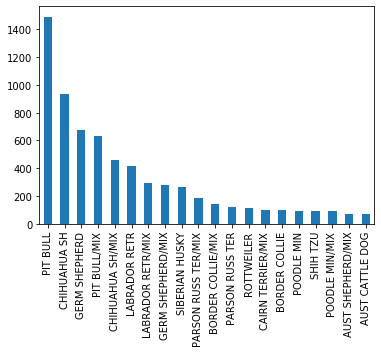

In [3]:
# Take a quick peak at charts

# Top Breeds
# df['Breed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df['Breed'].value_counts().head(20).plot.bar()

# Sex split?
# df['Sex'].value_counts().head(20).plot.bar()

# Fixed?
df['Breed'].value_counts().head(20).plot.bar()

# Age chart
# bins= [0,24,72,120]
# plt.hist(df.Age_month, bins=bins, edgecolor="k")
# plt.xticks(bins)
# plt.show()

In [4]:
df["DateOfBirth"] = pd.to_datetime(df["DateOfBirth"])
df["IntakeDate"] = pd.to_datetime(df["IntakeDate"])
df["OutcomeDate"] = pd.to_datetime(df["OutcomeDate"])

In [5]:
df.dtypes

Name                     object
Breed                    object
Color                    object
Sex                      object
Size                     object
DateOfBirth      datetime64[ns]
IntakeDate       datetime64[ns]
OutcomeDate      datetime64[ns]
DaysinShelter             int64
IntakeType               object
OutcomeType              object
dtype: object

In [6]:
df['AgeMonth'] = round(((df['IntakeDate'] - df['DateOfBirth']).dt.days)/30, 2)

df.head()
# print(df)

,Name,Breed,Color,Sex,Size,DateOfBirth,IntakeDate,OutcomeDate,DaysinShelter,IntakeType,OutcomeType,AgeMonth
0,SKY,GERM SHEPHERD,BLACK/TAN,Female,MED,NaT,2020-01-19,2020-01-23,4,STRAY,RETURN TO OWNER,NaN
1,COCO,BEAGLE,TRICOLOR,Neutered,SMALL,2015-06-04,2017-08-30,2017-04-10,35,STRAY,TRANSFER,27.27
2,SUZIE,LABRADOR RETR/MIX,BLACK,Spayed,LARGE,2011-01-23,2015-07-01,2015-01-24,17,STRAY,ADOPTION,54.00
3,BUBBLES,FOX TERR SMOOTH/MIX,TAN,Male,SMALL,2017-04-28,2020-03-20,2020-03-20,0,OWNER SURRENDER,TRANSFER,35.23
4,OSO,GERM SHEPHERD,BROWN/BLACK,Male,LARGE,2017-01-22,2020-01-22,2020-01-23,1,STRAY,RETURN TO OWNER,36.50


## Cleaning
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [7]:
# Quick check for missing values
df.apply(lambda x: sum(x.isnull()/len(df)))

Name             0.096322
Breed            0.000000
Color            0.000000
Sex              0.000000
Size             0.002640
DateOfBirth      0.161599
IntakeDate       0.000000
OutcomeDate      0.003277
DaysinShelter    0.000000
IntakeType       0.000000
OutcomeType      0.003277
AgeMonth         0.161599
dtype: float64

In [8]:
df.head()

,Name,Breed,Color,Sex,Size,DateOfBirth,IntakeDate,OutcomeDate,DaysinShelter,IntakeType,OutcomeType,AgeMonth
0,SKY,GERM SHEPHERD,BLACK/TAN,Female,MED,NaT,2020-01-19,2020-01-23,4,STRAY,RETURN TO OWNER,NaN
1,COCO,BEAGLE,TRICOLOR,Neutered,SMALL,2015-06-04,2017-08-30,2017-04-10,35,STRAY,TRANSFER,27.27
2,SUZIE,LABRADOR RETR/MIX,BLACK,Spayed,LARGE,2011-01-23,2015-07-01,2015-01-24,17,STRAY,ADOPTION,54.00
3,BUBBLES,FOX TERR SMOOTH/MIX,TAN,Male,SMALL,2017-04-28,2020-03-20,2020-03-20,0,OWNER SURRENDER,TRANSFER,35.23
4,OSO,GERM SHEPHERD,BROWN/BLACK,Male,LARGE,2017-01-22,2020-01-22,2020-01-23,1,STRAY,RETURN TO OWNER,36.50


In [9]:
# Drop unnessary columns
df2 = df.drop(columns=['Name','DateOfBirth', 'IntakeDate', 'OutcomeDate', 'DaysinShelter'])

In [10]:

# df2.head()
df2.shape

(10984, 7)

In [11]:
# Drop rows where Outcome_Type is null

df2 = df2.loc[df2.OutcomeType.notna(), ["OutcomeType", "Breed", "Color", "Sex" ,"Size", 'IntakeType', 'AgeMonth']]

In [12]:
# Check for more nulls

df2.apply(lambda x: sum(x.isnull()/len(df2)))



OutcomeType    0.000000
Breed          0.000000
Color          0.000000
Sex            0.000000
Size           0.002649
IntakeType     0.000000
AgeMonth       0.161034
dtype: float64

In [13]:
# Have to fix the following columns "Size"
df2 = df2.dropna(axis=0, subset=["Size", "AgeMonth"])

In [14]:
# Verify that nulls from "Fixed" and "Sex" have been dropped
df2.apply(lambda x: sum(x.isnull()/len(df2)))


OutcomeType    0.0
Breed          0.0
Color          0.0
Sex            0.0
Size           0.0
IntakeType     0.0
AgeMonth       0.0
dtype: float64

In [15]:
df2.shape

(9164, 7)

In [16]:
# # df2.groupby('Outcome_Type').count()
# df2.groupby('Color').count().sort_values('Outcome_Type', ascending=False)
df2.groupby('OutcomeType').count()

,Breed,Color,Sex,Size,IntakeType,AgeMonth
OutcomeType,,,,,,
ADOPTION,2839,2839,2839,2839,2839,2839
DIED,14,14,14,14,14,14
DISPOSAL,10,10,10,10,10,10
ESCAPED/STOLEN,2,2,2,2,2,2
EUTHANIZE,805,805,805,805,805,805
RETURN TO OWNER,4330,4330,4330,4330,4330,4330
RTOS,5,5,5,5,5,5
TRANSFER,1159,1159,1159,1159,1159,1159


In [17]:
# Drop all rows 'Return to Owner' ???  Assuming that chip is checked at intake

df3 = df2.drop(df2[df2.OutcomeType == "RETURN TO OWNER"].index)

In [18]:
# Verify shape
df3.head()

,OutcomeType,Breed,Color,Sex,Size,IntakeType,AgeMonth
1,TRANSFER,BEAGLE,TRICOLOR,Neutered,SMALL,STRAY,27.27
2,ADOPTION,LABRADOR RETR/MIX,BLACK,Spayed,LARGE,STRAY,54.00
3,TRANSFER,FOX TERR SMOOTH/MIX,TAN,Male,SMALL,OWNER SURRENDER,35.23
7,TRANSFER,GERM SHEPHERD,BLACK/TAN,Neutered,LARGE,STRAY,146.10
11,TRANSFER,PIT BULL/BORDER COLLIE,BLACK/WHITE,Neutered,SMALL,OWNER SURRENDER,22.80


## Add new features?
1. New feature? - Mixed/Pure Breed? - COMPLETED!! 
2. Split breeds - COMPLETED!!
3. Color -  We have 333 unique color combinations. Hot encoding "Color" will create additional X features if we didn't do anything.  This would be unlikely to create a good performing model.
    *  Option 1 - We take any values occurring fewer than 300 times and places them into the “other” label. We use this to create a new feature called “Top_colors”.  Doing this would reduce 333 unique colors to 30 unique values - COMPLETED!
    *  Option 2 - Split to primary color vs secondary color? - COMPLETED!
4. Creating age groups - COMPLETED!!
5. Breeds - Hot encoding "Breed" will create additional 1,380 new features if we didn't do anything.  
6. New feature? - Single color/Multi color?

#### Creating a Mix/Pure Breed column - As of May 20 9pm, MIX doesn't do anything cause assuming all breeds are mixed.
#### Creating Kelly's 3 breed categories: 0 = mix, secondary not listed ; 1 = secondary breed listed; 2 = purebred

1. Create new MIX column (Kelly's 3 categories)
2. Split breed into breed_primary and breed_second


#### solution - Creating a Breed_category column AND Split into Breed_primary/Breed_second
* 0 = Breed has the word "Mix"
* 1 = If there are 2 breeds listed
* 2 = Only 1 breed in the primary (i.e. None in secondary OR Pure)

In [19]:
# # Make a copy and add new column called Breed_category, set all to PURE
# df4 = df3.copy()
# df4["Breed_category"]= "Prob_pure"
# df4.head()

In [20]:
# # Split Primary and Secondary
# df4[['Breed_primary','Breed_second']] = df4.Breed.str.split("/", n=1, expand=True) 

In [21]:
# # Find rows containing word "Mix" and set to 0
# df4.loc[df4["Breed"].str.contains("Mix"), "Breed_category"] = "Mix"

In [22]:
# # Find rows containing word "/" and set to 1
# df4.loc[df4["Breed"].str.contains("\/"), "Breed_category"] = "Two"

In [23]:
# df4.groupby(['Mix']).count().sort_values("Breed", ascending=False).head(10)
# df4['Breed'].str.count('\/').sum()

In [24]:
# Double checking slashes with isalpha() - About the same number.  Off by 2 
# removing white spaces 
# df4["Breed"]= df4["Breed"].str.replace(" ", "") 
# df4.loc[180:190, :]


In [25]:
# creating bool series with new column 
# df4["bool_series2"]= df4["Breed"].str.isalpha()
# df4.loc[180:190, :]
# df4.groupby(['bool_series2']).count()

In [26]:
# print(f'Pure breed: {48025-34048-8480}')

In [27]:
# # Rename the breed WITHOUT the word MIX
# df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'] = df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'].str.replace(' Mix', '')

In [28]:
# How many unique breed combinations before split?
# Breed column - 1854

# How many unique breed combinations AFTER split?
# Breed_primary - 371
# Breed_second - 163


In [29]:
# # breed_top10primary = [x for x in df4.Breed_primary.value_counts().sort_values(ascending=False).head(15).index]
# # breed_top10primary

# df4.Breed_primary.value_counts().sort_values(ascending=False).head(20)

In [30]:
# breed_counts = df4['Breed_primary'].value_counts()
# breed_counts

In [31]:
# breed_others = set(breed_counts[breed_counts < 500].index)
# df4['Top_breed'] = df4['Breed_primary'].replace(list(breed_others), 'Others')
# # print(df4['Top_breed'].nunique())


In [32]:
# breed_top10second = [x for x in df4.Breed_second.value_counts().sort_values(ascending=False).tail(10).index]
# breed_top10second

# df4.Breed_second.value_counts().sort_values(ascending=False).head(10)

# QUESTION!  Should you not use breed_second?

#### Handling Color - Option 1 (Grouping colors)
* How does option1 effect RF/LogReg models?


In [33]:
# # How many unique color combinations?  - 333
# color_counts = df4['Color'].value_counts()
# # len(color_counts)
# print(df4['Color'].nunique())
# color_counts.head(20)

In [34]:
# # # Handling "Color" Option 1
# color_others = set(color_counts[color_counts < 1200].index)
# df4['Top_colors'] = df4['Color'].replace(list(color_others), 'Others')
# print(df4['Top_colors'].nunique())

In [35]:
# # Add new column called Color_new and set to Color
# df5 = df4.copy()
# df5["Color_new"]=df4["Color"]
# df5.head()
# df5.loc[320:330, :]

In [36]:
# Can't do this code here.  It takes COMBI tan/white and changes that to tan!  WRONG!!  I only want tan column


# Find rows containing colors: Gold/Yellow/Tan/Fawn/Buff/Apricot/Cream and set all to YELLOW
# df5.loc[df5["Color"].str.contains('Gold|Yellow|Tan|Fawn|Buff|Apricot|Cream'), "Color_new"] = "Tan"
# df5.loc[264:267, :]

#### Handling Color - Option 2 (Split and have intaker check all colors that apply)
* How does option2 effect RF/LogReg models?

In [37]:
# Split Top_color column into color1, color2
# df3[['Color1','Color2']] = df3.Color.str.split("/", n=1, expand=True) 

In [38]:
# df3.loc[150:160, :]

In [39]:
# How many unique colors? - 333 unique color combinations
# df4.Color.value_counts().sort_values(ascending=False).head(20)
# len(df3.Color.value_counts())

# # How many unique colors in COLOR1? - 37
# len(df3.Color1.value_counts())

# How many unique colors in COLOR2? - 34
# len(df3.Color2.value_counts())

In [40]:
# color_top10Color1 = [x for x in df3.Color1.value_counts().sort_values(ascending=False).head(30).index]
# color_top10Color1

# df3.Color1.value_counts().sort_values(ascending=False).head(40)

In [41]:
# color_top10Color2 = [x for x in df3.Color2.value_counts().sort_values(ascending=False).head(10).index]
# color_top10Color2

# df3.Color2.value_counts().sort_values(ascending=False).head(40)

#### Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [42]:
# df4['Pet_age_category'] = pd.cut(x=df4['Age_month'], bins=[0, 6, 24, 84,240], labels=['Baby', 'Young', 'Adult', 'Senior'])

In [43]:
# df4.loc[50000:50020, :]
# df4.tail()

In [44]:
# # What's the breakdown by Pet_age_category after binning??
# df4.Pet_age_category.value_counts().sort_values(ascending=False).head(10)

## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [45]:
# Create new BINARY_OUTCOME column and set to 0

df3["Binary_outcome"]=0
df3.head()

,OutcomeType,Breed,Color,Sex,Size,IntakeType,AgeMonth,Binary_outcome
1,TRANSFER,BEAGLE,TRICOLOR,Neutered,SMALL,STRAY,27.27,0
2,ADOPTION,LABRADOR RETR/MIX,BLACK,Spayed,LARGE,STRAY,54.00,0
3,TRANSFER,FOX TERR SMOOTH/MIX,TAN,Male,SMALL,OWNER SURRENDER,35.23,0
7,TRANSFER,GERM SHEPHERD,BLACK/TAN,Neutered,LARGE,STRAY,146.10,0
11,TRANSFER,PIT BULL/BORDER COLLIE,BLACK/WHITE,Neutered,SMALL,OWNER SURRENDER,22.80,0


In [46]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df3.loc[df3["OutcomeType"].str.contains("ADOPTION"), "Binary_outcome"] = 1

In [47]:
df3.head()

,OutcomeType,Breed,Color,Sex,Size,IntakeType,AgeMonth,Binary_outcome
1,TRANSFER,BEAGLE,TRICOLOR,Neutered,SMALL,STRAY,27.27,0
2,ADOPTION,LABRADOR RETR/MIX,BLACK,Spayed,LARGE,STRAY,54.00,1
3,TRANSFER,FOX TERR SMOOTH/MIX,TAN,Male,SMALL,OWNER SURRENDER,35.23,0
7,TRANSFER,GERM SHEPHERD,BLACK/TAN,Neutered,LARGE,STRAY,146.10,0
11,TRANSFER,PIT BULL/BORDER COLLIE,BLACK/WHITE,Neutered,SMALL,OWNER SURRENDER,22.80,0


## Still get_dummies

In [48]:
# Drop these columns:
# Outcome_Type column since we now have Binary_outcome 
# Age_month since we have Pet_age_category
# Breed since we have Breed_primary, Breed_second     - SHOULD BE DROP BREED_SECOND??
# Color since we have Color1, Color2
df4 = df3.drop(columns=['OutcomeType','Breed', 'Color', 'Sex','IntakeType', 'AgeMonth'])

# QUESTION!  
1. Should be take out BREED_SECOND? - Dont get_dummy Breed_second
2. Should be take out COLOR2?

In [49]:
df4.head()

,Size,Binary_outcome
1,SMALL,0
2,LARGE,1
3,SMALL,0
7,LARGE,0
11,SMALL,0


In [50]:
# # import preprocessing from sklearn
# from sklearn.preprocessing import LabelEncoder

In [51]:
df5 = pd.get_dummies(df4[['Size', 'Binary_outcome']])

In [52]:
df5.columns

Index(['Binary_outcome', 'Size_LARGE', 'Size_MED', 'Size_PUPPY', 'Size_SMALL',
       'Size_TOY', 'Size_X-LRG'],
      dtype='object')

In [53]:
# Define X and y
X = df5.drop(['Binary_outcome', 'Size_LARGE'], axis="columns")
y = df5[['Binary_outcome']]

In [54]:
X

,Size_MED,Size_PUPPY,Size_SMALL,Size_TOY,Size_X-LRG
1,0,0,1,0,0
2,0,0,0,0,0
3,0,0,1,0,0
7,0,0,0,0,0
11,0,0,1,0,0
...,...,...,...,...,...
10971,0,0,0,0,0
10973,0,0,0,0,0
10975,1,0,0,0,0
10977,0,0,0,0,0


In [55]:
y

,Binary_outcome
1,0
2,1
3,0
7,0
11,0
...,...
10971,0
10973,0
10975,0
10977,0


## Random Forest model


In [56]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
# Import, initialize, fit and predict
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 10) 
rf_model.fit(X_train, y_train)
predict_y_test = rf_model.predict(X_test)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [58]:
# Validate - run accuracy score
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, predict_y_test))

Accuracy score:  0.5831265508684863


In [59]:
# RF Feature importance?
feature_list = list(X.columns)
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False) 
print(feature_importance[0:10])

Size_PUPPY    0.407175
Size_SMALL    0.276870
Size_TOY      0.223330
Size_MED      0.082243
Size_X-LRG    0.010381
dtype: float64


In [60]:
# Validate with cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=10, scoring="accuracy")
print(scores)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selec

[0.59917355 0.57024793 0.56818182 0.63842975 0.61283644 0.58592133
 0.60869565 0.62318841 0.63354037 0.61904762]


In [61]:
scores.mean()

0.6059262871515836

## Logistic Regression

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
print(f"Training Data Score: {logReg.score(X_train, y_train)}")
print(f"Testing Data Score: {logReg.score(X_test, y_test)}")

Training Data Score: 0.6135172413793103
Testing Data Score: 0.5831265508684863


## Naive Bayes model


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb_model = GaussianNB()

# Train the model using the training sets
nb_model.fit(X_train, y_train)

#Predict Output
y_predicted= nb_model.predict(X_test)


C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
print(y_predicted)

[0 0 0 ... 0 0 1]


In [68]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.544251447477254


## SVM


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)  

target = df6["Binary_outcome_Positive"]



NameError: name 'df6' is not defined

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

In [ ]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

In [ ]:
 # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))